In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('https://angel-corona.s3.amazonaws.com/owid-covid-data.csv')
df.fillna('0')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0,0,...,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0,0,...,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0,0,...,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0,0,...,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0,0,...,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49432,0,0,International,2020-10-07,696,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
49433,0,0,International,2020-10-08,696,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
49434,0,0,International,2020-10-09,696,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
49435,0,0,International,2020-10-10,696,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
df_filter = df[df['date'] =='2020-10-11']

In [5]:
df_filter.fillna('0')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
285,AFG,Asia,Afghanistan,2020-10-11,39703.0,0,58,1473.0,0,1.571,...,1803.99,0,597.029,9.59,0,0,37.746,0.5,64.83,0.498
502,ALB,Europe,Albania,2020-10-11,15231.0,165,159.143,416.0,3,3.429,...,11803.4,1.1,304.195,10.08,7.1,51.2,0,2.89,78.57,0.785
788,DZA,Africa,Algeria,2020-10-11,52940.0,136,135,1795.0,6,5.571,...,13913.8,0.5,278.364,6.73,0.7,30.4,83.741,1.9,76.88,0.754
1006,AND,Europe,Andorra,2020-10-11,2696.0,0,83.714,55.0,0,0.286,...,0,0,109.135,7.97,29,37.8,0,0,83.73,0.858
1210,AGO,Africa,Angola,2020-10-11,6031.0,73,117.143,212.0,4,3.286,...,5819.49,0,276.045,3.94,0,0,26.664,0,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48452,YEM,Asia,Yemen,2020-10-11,2055.0,1,1.571,595.0,1,0.714,...,1479.15,18.8,495.003,5.35,7.6,29.2,49.542,0.7,66.12,0.452
48659,ZMB,Africa,Zambia,2020-10-11,15339.0,38,52.143,336.0,1,0.429,...,3689.25,57.5,234.499,3.94,3.1,24.7,13.938,2,63.89,0.588
48864,ZWE,Africa,Zimbabwe,2020-10-11,8010.0,16,17.857,230.0,1,0.286,...,1899.78,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
49150,OWID_WRL,0,World,2020-10-11,37287908.0,338306,327699,1073675.0,4711,5631.86,...,15469.2,10,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0


In [6]:
import scipy
import seaborn as sns


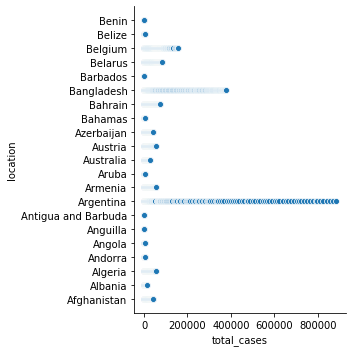

In [7]:
a=df.iloc[100:5000,[1,2,3,4,5,6,7,8,9,10]]

replot=sns.relplot(x="total_cases", y="location", data=a)
replot.savefig("location_totalcases_replot.jpg")

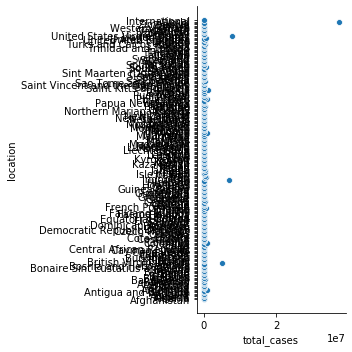

In [8]:
graph= sns.relplot(x="total_cases", y="location",data=df_filter)

In [9]:
replot.savefig("location_totalcases.jpg")

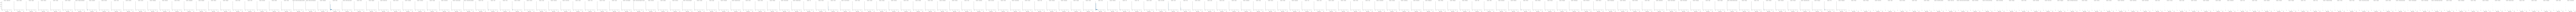

In [10]:

b = sns.FacetGrid(df, col = "location")
figure1=b.map(plt.hist, "total_cases")
figure1.savefig("location_totalcases_facetgrid.jpg")


Nepal


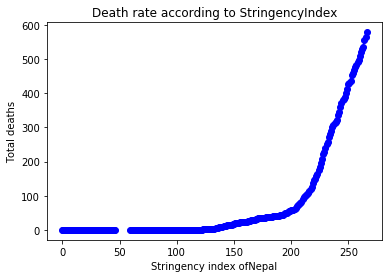

In [17]:
country=input()
y1 = df[(df['location']== country) & (df['stringency_index'] > 0) ][['total_deaths']]
x1 =(df[(df['location']== country) &(df['stringency_index'] > 0) ] [['stringency_index']])
figure4=plt.plot(range(0,len(x1)), y1, 'bo--')
plt.title("Death rate according to StringencyIndex")
plt.xlabel("Stringency index of" + country )
plt.ylabel("Total deaths")
plt.savefig("plot_stringencyindex_totaldeaths.jpg")



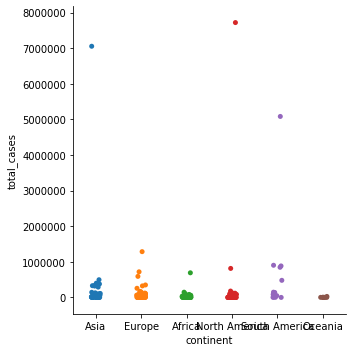

In [15]:
figure3=sns.catplot(x="continent", y="total_cases", data=df_filter)
figure3.savefig("catplot_continent_totalcases.jpg")

Nepal


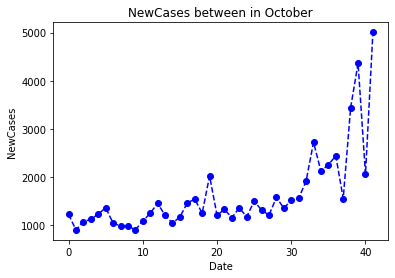

In [18]:
country=input()
y1 = df[(df['location']== country) & (df['date'] > '2020-08-30') ][['new_cases']]
x1 =(df[(df['location']== country) &(df['date'] > '2020-08-30') ] [['date']])
figure4=plt.plot(range(0,len(x1)), y1, 'bo--')
plt.title("NewCases between in October")
plt.xlabel("Date")
plt.ylabel("NewCases")
plt.savefig("plot_country_specificdate_newcases.jpg")